# Assignment 2

## Part 1

In this part a prediction error method will be used to estimate the parameters of a the data generated in part 1 in exercise 1. 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.optimize import minimize
data = pd.read_csv('/Users/loveredin/Documents/GitHub/advanced_time_series_analysis/assignment_2/data.csv', index_col = 0)
print(data.head())
X_t = np.array(data['Value'])
print(X_t)

      Value
0  0.000000
1  2.496714
2  2.361079
3  3.119904
4  4.147011
[ 0.          2.49671415  2.36107853 ... -5.18094676 -5.2957901
 -4.15212948]


In [68]:
def kernel(x, kernel_function = 'gaussian'):

    # Define different cases of kernel functions
    if kernel_function == 'gaussian':
        return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)
    elif kernel_function == 'tricube':
        in_interval = np.abs(x) <= 1
        weights = np.zeros_like(x, dtype = float)
        weights[in_interval] = (1 - np.abs(x[in_interval]) ** 3) ** 3
        return weights
    else:
        return 1 / 2 * ((x >= -1) & (x <= 1)).astype(float)


In [69]:
# Algo:
# Define the loss function
# Taylor expansion of loss function, done analytically
# Evaluate the taylor expansion of order 2, in the point theta_0
# Calculate gradient and hessian, evaluated at theta_0 and theta_est
# Use the scipy function minimization, when defined the loss function, to estimate the new parameters
# Estimate new parameters based on old, equation

# Only make small adjustments, 

# The data we are working with and am trying to estimate the parameters for is a setar model, with four parameters, theta_00, theta_01, theta_10, theta, 
# Want to compute the value for all N time values of the time series


def conditional_expectation(X_t_lagged, theta, threshold = 0):
    return np.where(X_t_lagged < threshold, theta[0] + theta[1] * X_t_lagged, 2 + 0.2 * X_t_lagged)
    
def loss_function(X_t, theta, conditional_expectation):
    # This function defines the lag for which, time series to use, in this case it is going to be the lagged 1 time series
    
    # Optimization is carried out for all N, the length of the entire time series
    # If the optimizartion were to be carried out for a sub-sequent of the time series, the partial time series X_t of length N, would have been investigated
    # Here N = len(X_t) - 1

    return sum((X_t[1 : ] - conditional_expectation(X_t[ : -1], theta)) ** 2)   

# Only estimate two parameters
theta_0 = np.zeros(2)

theta_hat = minimize(lambda theta: loss_function(X_t, theta, conditional_expectation), theta_0)

print(theta_hat)

print(f'The parameter estimation is {theta_hat.x}')

# optimized theta: [-2.06836669  0.48354977]
# Actual theta [-2, 0.5], fairly good estimation, only estimated two of the parameters, with the other ones fixed to make 2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 10064.629589345956
        x: [-2.068e+00  4.835e-01]
      nit: 6
      jac: [ 1.221e-04  4.883e-04]
 hess_inv: [[ 7.388e-04  1.705e-04]
            [ 1.705e-04  4.242e-05]]
     nfev: 180
     njev: 57
The parameter estimation is [-2.06836788  0.48354951]


## Part 2

Plotting contour curves for different values of N, for the loss

(1000, 1000)
[[26795.6621332  26824.32785756 26853.01349372 ... 65261.71932448
  65310.23711713 65358.77482158]
 [26670.48371668 26699.07138802 26727.67897115 ... 65058.72204374
  65107.16178336 65155.62143478]
 [26545.63727381 26574.14689213 26602.67642224 ... 64856.05673664
  64904.41842324 64952.80002164]
 ...
 [66819.69249707 66770.5393572  66721.40612913 ... 27700.34205344
  27671.04098186 27641.75982207]
 [67025.49181475 66976.26062186 66927.04934077 ... 27828.3225069
  27798.94338229 27769.58416949]
 [67231.62310609 67182.31386018 67133.02452606 ... 27956.63493401
  27927.17775638 27897.74049055]]



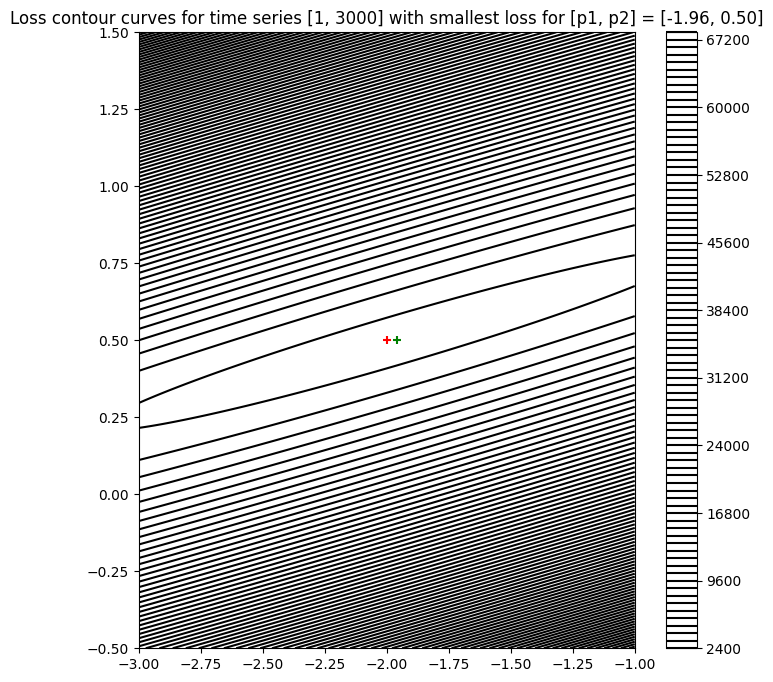

(1000, 1000)
[[ 586.57884269  586.99534041  587.41212669 ... 1145.10720592
  1145.81141477 1146.51591219]
 [ 584.90521866  585.32059463  585.73625917 ... 1142.31520212
  1143.01828922 1143.7216649 ]
 [ 583.23620741  583.65046163  584.06500442 ... 1139.52781109
  1140.22977645 1140.93203038]
 ...
 [1208.24564675 1207.54376469 1206.84217121 ...  651.7493806
   651.33520967  650.92132733]
 [1211.17095839 1210.46795458 1209.76523936 ...  653.55631247
   653.1410198   652.72601571]
 [1214.1008828  1213.39675725 1212.69292028 ...  655.36785711
   654.9514427   654.53531686]]



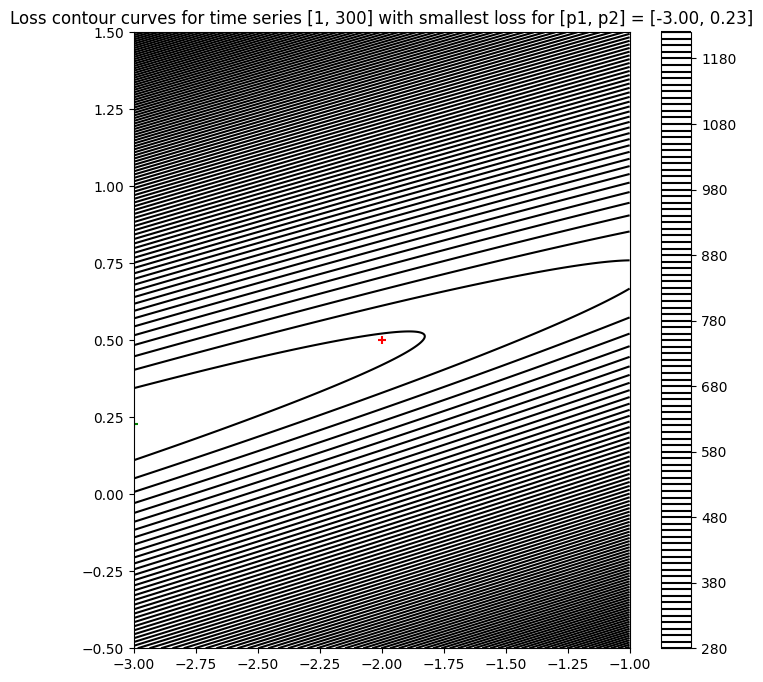

(1000, 1000)
[[24.22050295 24.22050295 24.22050295 ... 24.22050295 24.22050295
  24.22050295]
 [24.22050295 24.22050295 24.22050295 ... 24.22050295 24.22050295
  24.22050295]
 [24.22050295 24.22050295 24.22050295 ... 24.22050295 24.22050295
  24.22050295]
 ...
 [24.22050295 24.22050295 24.22050295 ... 24.22050295 24.22050295
  24.22050295]
 [24.22050295 24.22050295 24.22050295 ... 24.22050295 24.22050295
  24.22050295]
 [24.22050295 24.22050295 24.22050295 ... 24.22050295 24.22050295
  24.22050295]]



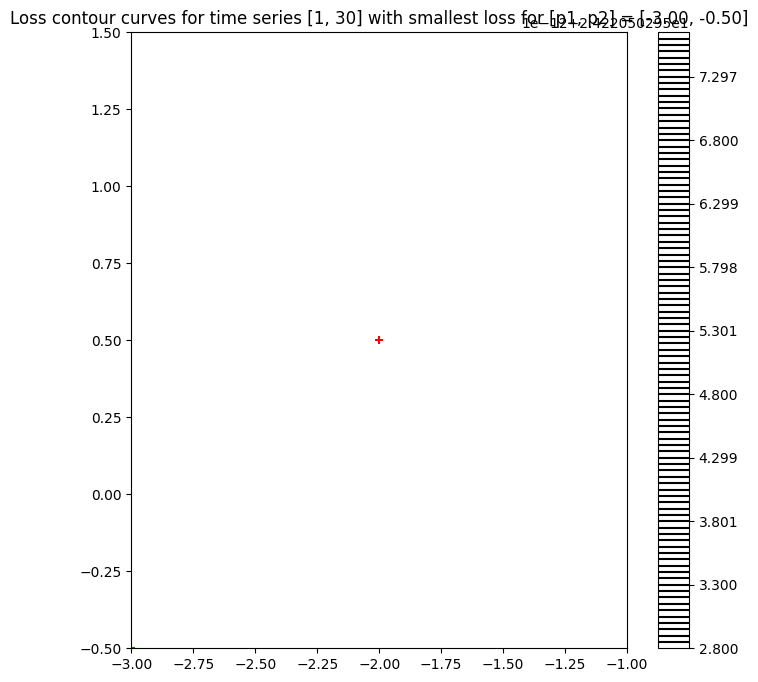

(1000, 1000)
[[2833.15953157 2836.3745685  2839.5919942  ... 7224.59254726
  7230.18919302 7235.78822756]
 [2819.47568419 2822.68166118 2825.89002694 ... 7201.87594232
  7207.46352814 7213.05350274]
 [2805.82935627 2809.02627332 2812.22557915 ... 7179.19685683
  7184.77538272 7190.35629738]
 ...
 [7819.00019713 7813.18247649 7807.36714463 ... 3204.77392136
  3201.33780956 3197.90408653]
 [7842.72325036 7836.89646978 7831.07207798 ... 3219.46421702
  3216.01904528 3212.57626232]
 [7866.48382305 7860.64798253 7854.8145308  ... 3234.19203215
  3230.73780047 3227.28595757]]



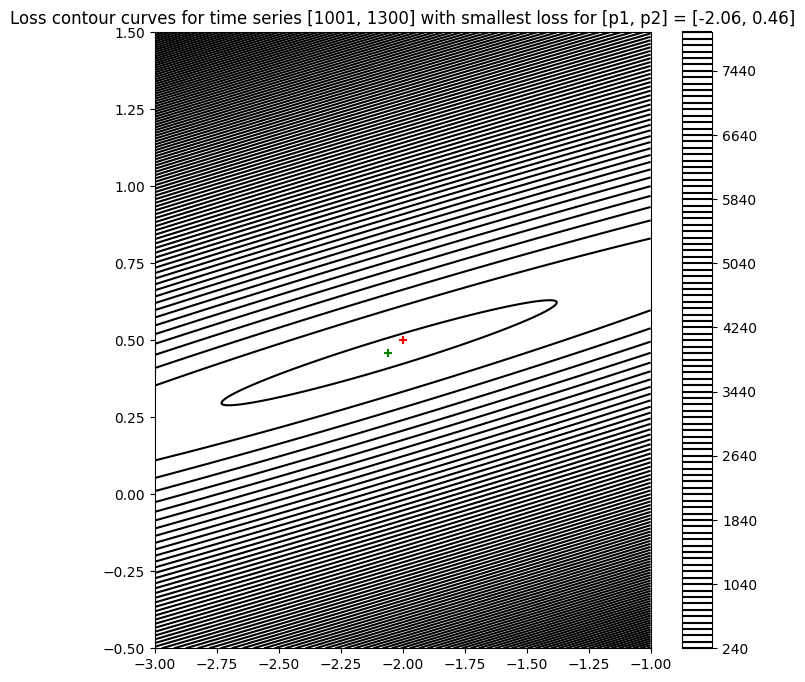

(1000, 1000)
[[110.34190783 110.52451897 110.70735456 ... 403.84532616 404.25171263
  404.65832355]
 [109.70329553 109.88521842 110.06736576 ... 402.5205328  402.92623102
  403.33215368]
 [109.06697258 109.24820722 109.42966632 ... 401.19802878 401.60303876
  402.00827318]
 ...
 [610.32543345 609.82186352 609.31851805 ... 219.70633375 219.42653915
  219.146969  ]
 [611.96931109 611.46505292 610.9610192  ... 220.66403033 220.38354749
  220.1032891 ]
 [613.61547809 613.11053168 612.60580972 ... 221.62401627 221.34284518
  221.06189855]]



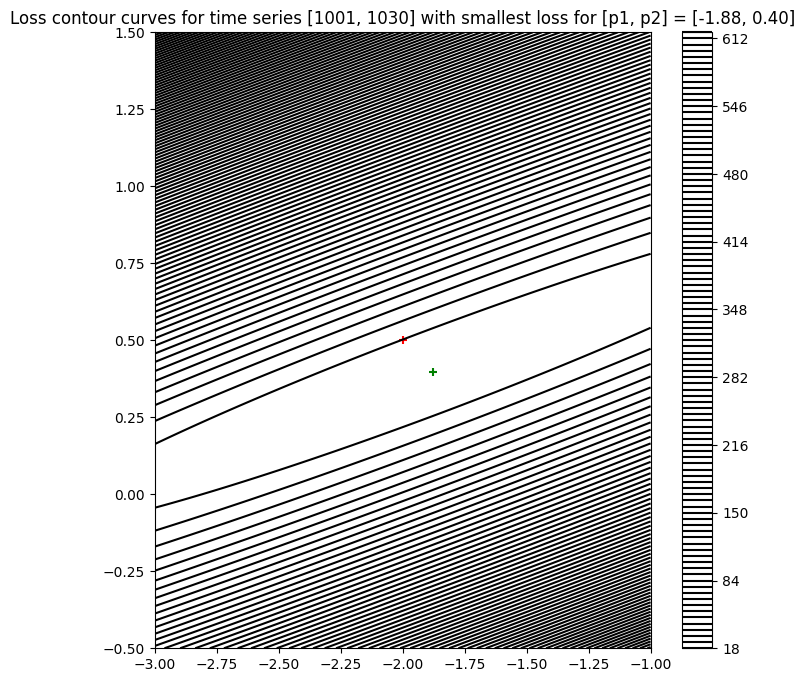

In [70]:
theta_3, theta_4 = 2, 0.2
# Actual theta_1, theta_2 = [-2, 0.5]
theta_asterisk = [[theta_hat.x[0],  theta_hat.x[1]],  [theta_3, theta_4]]

def model(X_t_1, theta_asterisk):
    if X_t_1 < 0:
        return theta_asterisk[0][0] + theta_asterisk[0][1] * X_t_1
    else: 
        return theta_asterisk[1][0] + theta_asterisk[1][1] * X_t_1
    

# In this part, it is desired to create a 3d contour plot of the N, and the lag??
# The following contour curves function will be used
# plt.contour([X, Y, ], Z)

def plot_contour(X_t_subset, p1_range, p2_range, loss_function, range_idx ,estimation_function = conditional_expectation, nr_points = 1000):
    # In this, we want in an interval to plot the contours as a function of p1 and p2, for different lengths of the time series
    # We expect to see a lot of lines, decreases around the actual parameters, plot an 'x' around actual parameters
    
    # Determine the loss matrix
    # local_loss_matrix = np.array([[loss_function(X_t_subset, [p1, p2], estimation_function) for p2 in p2_range] for p1 in p1_range])
    local_loss_matrix = np.array([[loss_function(X_t_subset, [p1, p2], estimation_function) for p1 in p1_range] for p2 in p2_range])
    print(local_loss_matrix.shape)
    print(local_loss_matrix)
    print()
    min_row, min_col = int(np.floor(np.argmin(local_loss_matrix) / nr_points)), np.argmin(local_loss_matrix) % nr_points
    plt.figure(figsize = (8, 8))
    P1_RANGE, P2_RANGE = np.meshgrid(p1_range, p2_range)
    plt.contour(P1_RANGE, P2_RANGE, local_loss_matrix, colors = 'black', levels = 100)
    plt.colorbar()
    plt.scatter([-2], [0.5], marker = '+', label = 'Actual parameter', color = 'red', s = 30)
    smallest_loss_p1, smallest_loss_p2 = p1_range[min_col], p2_range[min_row]
    plt.scatter(smallest_loss_p1, smallest_loss_p2, marker = '+', label = 'Parameter set with smallest loss', color = 'green', s = 30)
    plt.title(f'Loss contour curves for time series [{range_idx[0]}, {range_idx[1]}] with smallest loss for [p1, p2] = [{smallest_loss_p1:.2f}, {smallest_loss_p2:.2f}]')
    plt.show()

# Defining parameters
def main():
    nr_points = 1000
    p1_range, p2_range = np.linspace(-3, -1, nr_points), np.linspace(- 1 / 2, 3 / 2, nr_points)
    
    starts, stops = [1, 1, 1, 1001, 1001], [3000, 300, 30, 1300, 1030]
    for interval_index, _ in enumerate(starts):
        plot_contour(X_t[starts[interval_index] : stops[interval_index]], p1_range, p2_range, loss_function, [starts[interval_index], stops[interval_index]], nr_points = nr_points)

main()



## Part 3

In this part, a doubly stochastic model will be simulated. The following AR(1)-AR(1) will be simulated.

0.3954064288083202 -0.21751612769960504
0.44196699313591925 0.05446040947558346
0.511639836332831 0.29565520827215963
0.5120448876514068 0.4452461837650472
0.44603094444828456 0.5067180022399762
0.3874196632160707 -0.0038612832175593526
0.4877875951530378 -0.018374387544521243
0.4998825274208742 -0.08436998562586678
0.34127213121248834 0.12044007844532259
0.49632680154236386 0.1011255916326306
0.5742780205512011 -0.01691344437898594
0.5236952858210686 -0.22394459453638083
0.5359332171141001 -0.15597179656367297
0.5694905098265782 -0.14038575814654933
0.5281745398335865 -0.20139617222691497
0.5565418429285942 0.3743936060631421
0.46817963600023016 0.5423927386726886
0.5460112583307595 0.5542377353533132
0.4761985940588088 0.2684237586280358
0.451702437168217 -0.11220369582179233
0.47525210768218956 0.05115095579041611
0.4491166697670261 -0.05541616048209639
0.5247806286082877 0.3469117441838207
0.58183559613468 -0.2603121855934736
0.47835731742796567 -0.07553878104349918
0.5948780807844

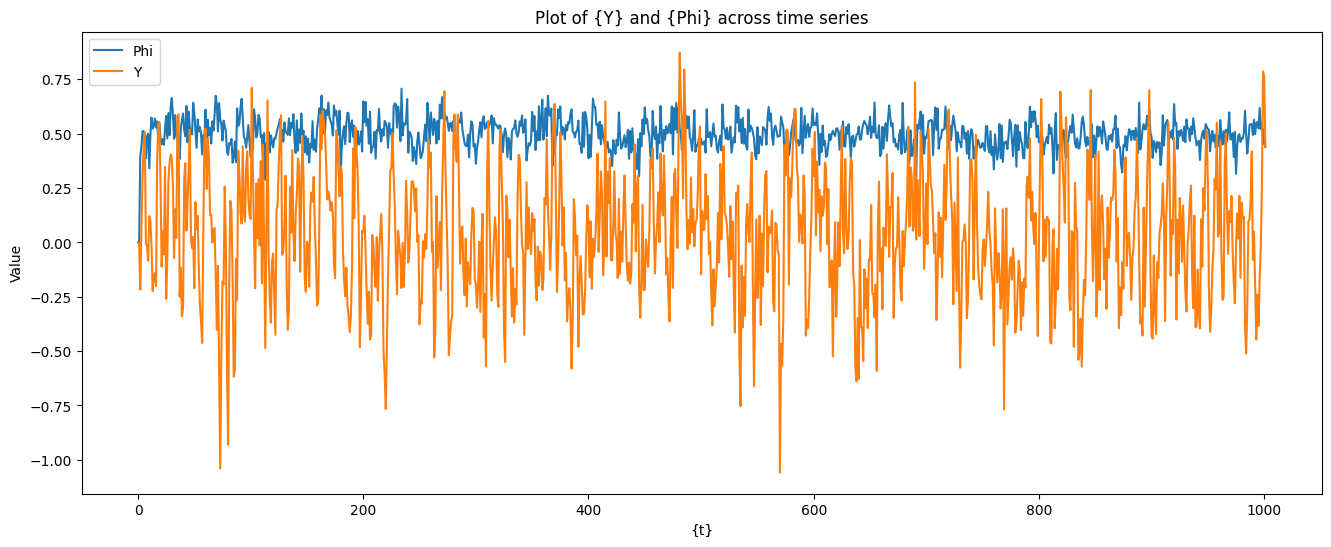

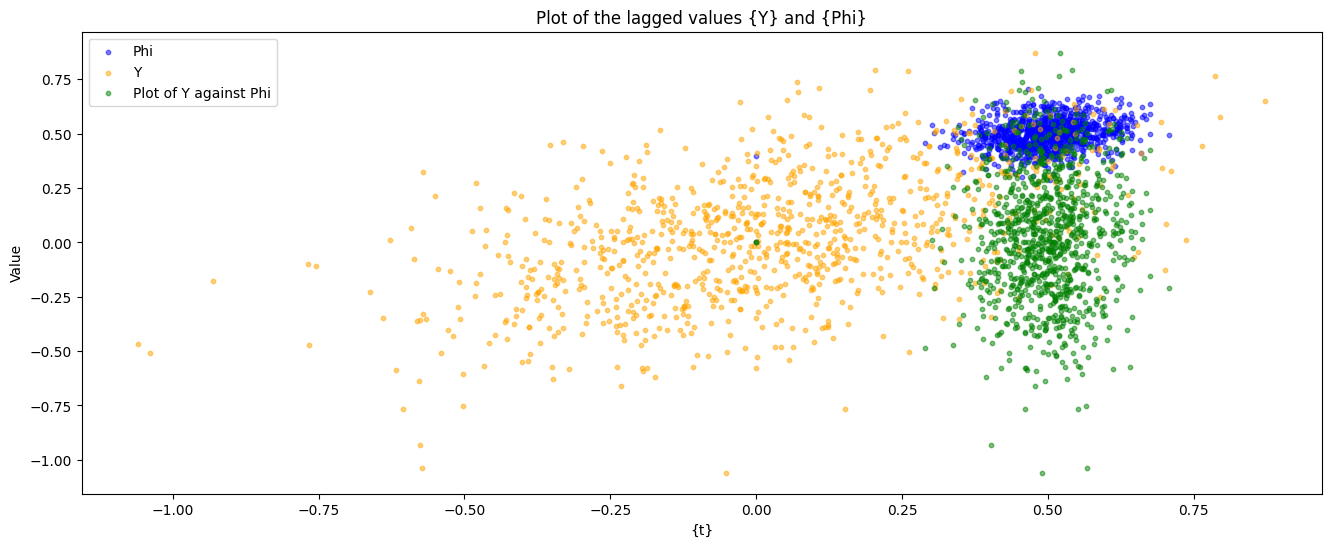

In [71]:
def doubly_stochastic(phi, mu, sigma_epsilon, sigma_zeta, nr_points = 1000): # , p1 = 1, p2 = 1): # Make adjustable with degree of AR model
    Phi, Y = [0], [0] # Initial values of the process
    for data in range(nr_points):
        epsilon_t = np.random.normal(0, sigma_epsilon ** 2)
        zeta_t = np.random.normal(0, sigma_zeta ** 2)
        Phi_t = mu + phi * (Phi[-1] - mu) + zeta_t
        Y_t = Phi_t * Y[-1] + epsilon_t
        Phi.append(Phi_t)
        Y.append(Y_t)

    return Phi, Y

def doubly_stochastic_AR_1_AR_2(phi_1, phi_2, mu, sigma_epsilon, sigma_zeta, nr_points = 1000): # , p1 = 1, p2 = 1): # Make adjustable with degree of AR model
    Phi, Y = [0, 0], [0, 0] # Initial values of the process
    for data in range(nr_points):
        # State space form (AR(1)-AR(2))
        epsilon_t = np.random.normal(0, sigma_epsilon ** 2)
        zeta_t = np.random.normal(0, sigma_zeta ** 2)
        delta = mu * (1 - phi_1 - phi_2) # Not updated, only parameters for the model
        A = np.array([[phi_1, phi_2, 1], [1, 0, 0], [0, 0, 1]])
        x = np.transpose(np.array([Phi[-1], Phi[-2], delta]))
        b = np.transpose(np.array([1, 0, 0]))
        

        # Calculate updated values
        Phi_asterisk = np.matmul(A, x) + b * zeta_t
        Phi_t = Phi_asterisk[0]
        Y_t = np.matmul(np.array([Y[-1], 0, 0]), Phi_asterisk) + epsilon_t
        print(Phi_t, Y_t)

        Phi.append(Phi_t)
        Y.append(Y_t)

    return Phi, Y


def plot_doubly_stochastic(phi = 1 / 8, 
                        mu = 1 / 4, 
                        sigma_epsilon = 1 / 2, 
                        sigma_zeta = 1 / 2, 
                        nr_points = 1000):
    
    # Phi, Y = doubly_stochastic(phi, mu, sigma_epsilon, sigma_zeta, nr_points)
    Phi, Y = doubly_stochastic_AR_1_AR_2(phi_1 = 1 / 8, phi_2 = 1 / 4, mu = 1 / 2, sigma_epsilon = 1 / 2, sigma_zeta = 1 / 4, nr_points = nr_points)
    plt.figure(figsize = (16, 6))
    plt.plot(np.arange(len(Phi)), Phi, label = 'Phi')
    plt.plot(np.arange(len(Y)), Y, label = 'Y')
    plt.legend()
    plt.title(rf'Plot of {{Y}} and {{Phi}} across time series')
    plt.xlabel(rf'{{t}}')
    plt.ylabel('Value')
    plt.show()

    # Plot the increments
    plt.figure(figsize = (16, 6))
    plt.scatter(Phi[ : -1], Phi[1 : ], label = 'Phi', color = 'blue', s = 10, alpha = 1 / 2)
    plt.scatter(Y[ : -1], Y[1 : ], label = 'Y', color = 'orange', s = 10, alpha = 1 / 2)
    plt.scatter(Phi, Y, label = 'Plot of Y against Phi', color = 'green', s = 10, alpha = 1 / 2)
    plt.legend()
    plt.title(rf'Plot of the lagged values {{Y}} and {{Phi}}')
    plt.xlabel(rf'{{t}}')
    plt.ylabel('Value')
    plt.show()


plot_doubly_stochastic()

## Part 4

In this part, the Extended Kalman Filter will be mnodelled.

### Part 4a

In this part the model defined below will be simulated. The model will be investigated further in the following part. However, first the data is required, which will be simulated with the parameter $a = 0.4$.

Model:

$$
x_{t + 1} = a x_{t} + v_t, \quad v_t \quad \text{normally distributed white noise with mean}, \mu_v = 0, \text{and variance}, \sigma_v^2 = 1
$$

$$
y_{t} = x_t + e_t, \quad e_t \quad \text{normally distributed white noise with mean}, \mu_e = 0, \text{and variance}, \sigma_e^2 = 1
$$

        X_t       Y_t
0  0.000000 -0.837991
1 -0.125205  0.129506
2  0.396765  0.515043
3  0.962135  1.810886
4  0.718803 -0.015482


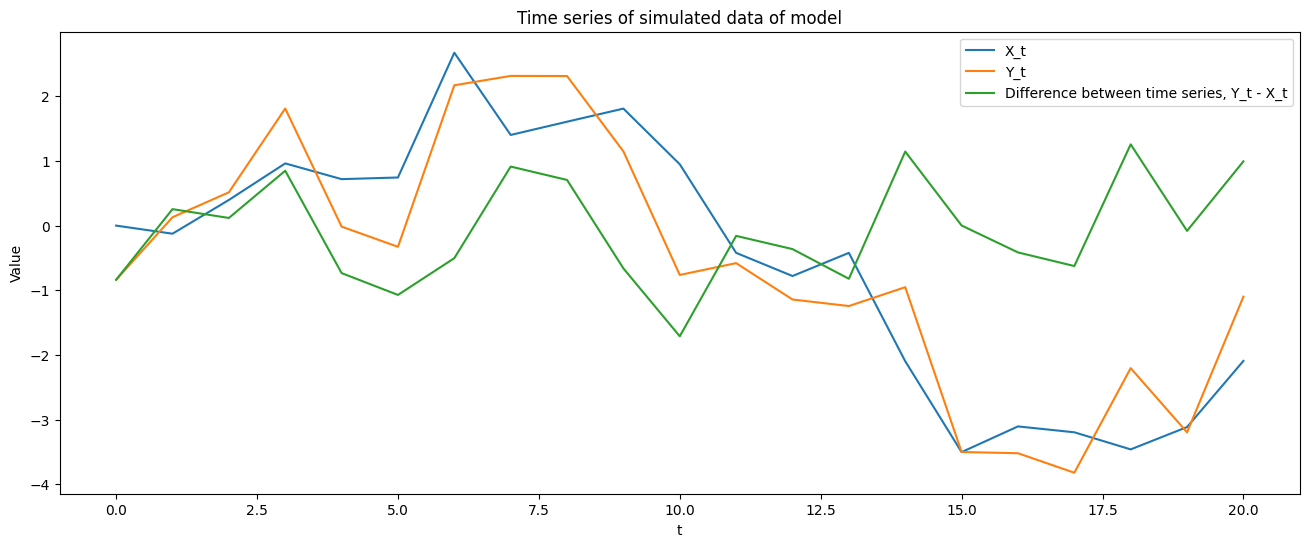

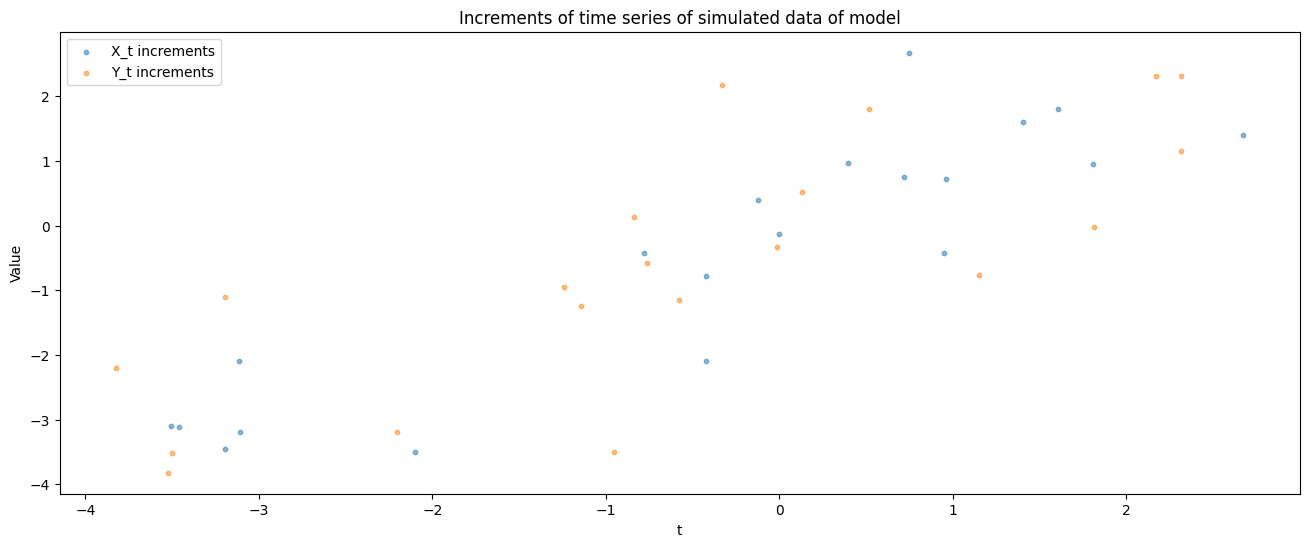

In [72]:
def model(a, sigma_v, sigma_e, nr_simulations):
    
    X, Y = [0], []
    state_vector = np.transpose(np.array([0, 0]))
    for state in range(nr_simulations):
        v_t, e_t = np.random.normal(0, sigma_v ** 2), np.random.normal(0, sigma_e ** 2) # Generate random errors
        state_vector = np.matmul(np.array([[1, 0], [1, 0]]), state_vector) + np.transpose(np.array([v_t, e_t]))
        X.append(np.transpose(state_vector)[0])
        Y.append(np.transpose(state_vector)[1])

    # Final value
    Y.append(X[-1] + np.random.normal(0, sigma_e))
    return X, Y

def plot_model(a, sigma_v, sigma_e, nr_simulations):
    X_t, Y_t = model(a = a, sigma_v = sigma_v, sigma_e = sigma_e, nr_simulations = nr_simulations)
    simulated_data = pd.DataFrame(np.transpose(np.array([X_t, Y_t])), columns = ['X_t', 'Y_t'])
    print(simulated_data.head())

    # Plot the time series
    plt.figure(figsize = (16, 6))
    plt.plot(simulated_data.index, simulated_data['X_t'], label = 'X_t')
    plt.plot(simulated_data.index, simulated_data['Y_t'], label = 'Y_t')
    plt.plot(simulated_data.index, (simulated_data['Y_t'] - simulated_data['X_t']), label = 'Difference between time series, Y_t - X_t')
    plt.title('Time series of simulated data of model')
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # Plot of increments
    plt.figure(figsize = (16, 6))
    plt.scatter(simulated_data['X_t'].values[ : -1], simulated_data['X_t'].values[1 : ], label = 'X_t increments', s = 10, alpha = 0.5)
    plt.scatter(simulated_data['Y_t'].values[ : -1], simulated_data['Y_t'].values[1 : ], label = 'Y_t increments', s = 10, alpha = 0.5)
    plt.title('Increments of time series of simulated data of model')
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    return simulated_data

# Execution of model
a, sigma_v, sigma_e, nr_simulations = 0.4, 1, 1, 20
simulated_data = plot_model(a = a, sigma_v = sigma_v, sigma_e = sigma_e, nr_simulations = nr_simulations)

### Part 4b
In this part the parameter $a$ of the model above will be estimated using an extended Kalman filter (EKF).

The following estimation is done for a_0 = 1 and sigma_v = 10
[[ 0.          0.        ]
 [-0.41899553  1.        ]
 [ 0.08181037  1.        ]
 [ 0.47797601  0.98498401]
 [ 1.67599175  0.9901243 ]
 [ 0.01181392  0.92385461]
 [-0.28211425  0.88563072]
 [ 1.73138261  0.90915285]
 [ 2.04158719  0.89867993]
 [ 2.11375505  0.92435015]
 [ 0.92619898  0.83221437]
 [-0.66505199  0.69480736]
 [-0.41021261  0.69799237]
 [-0.75993223  0.71326213]
 [-0.86301839  0.72071903]
 [-0.6829874   0.72309275]
 [-2.41662159  0.80732091]
 [-2.82930362  0.83360709]
 [-3.31111026  0.89894606]
 [-1.81462944  0.82765997]
 [-2.71830065  0.90979461]]


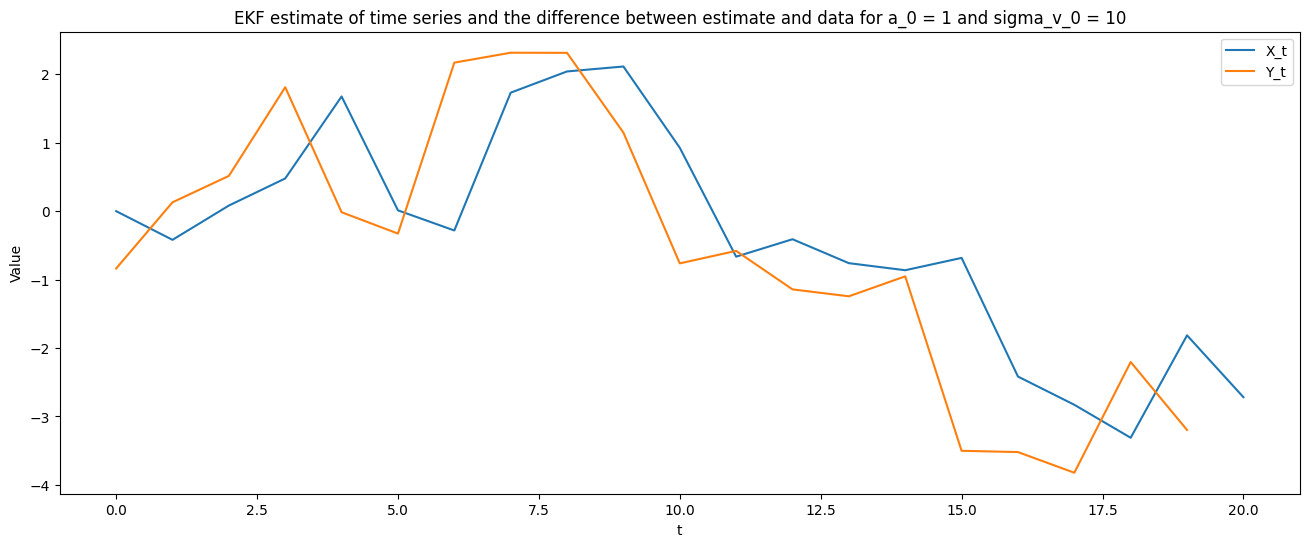

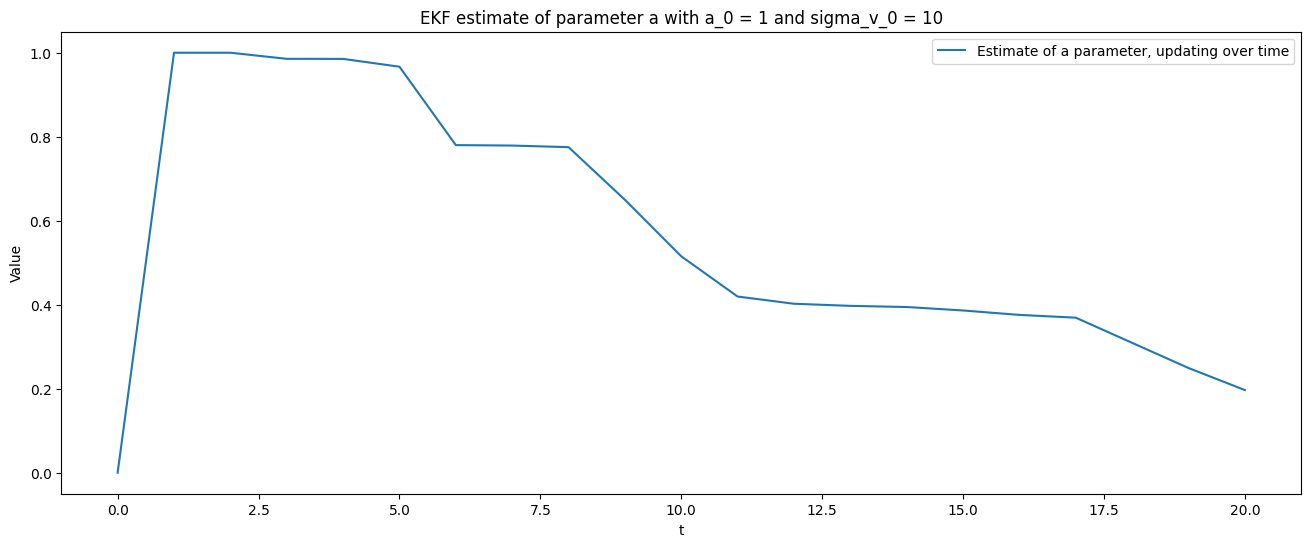

The following a values were observed: [0.         1.         1.         0.98547745 0.98530021 0.9667002
 0.78004613 0.77896078 0.77517044 0.64982749 0.51523329 0.41946998
 0.40231175 0.39728102 0.3945466  0.38629609 0.37576145 0.36913467
 0.30915191 0.24927147 0.1967998 ]
The following estimation is done for a_0 = 1 and sigma_v = 1
[[ 0.          0.        ]
 [-0.41899553  1.        ]
 [-0.08989451  1.        ]
 [ 0.30530021  0.90867927]
 [ 1.09354836  0.77628994]
 [ 0.23025032  0.68952632]
 [-0.15605794  0.52636263]
 [ 0.59616896  0.84561221]
 [ 1.27700903  0.83496764]
 [ 1.76047899  0.96454201]
 [ 1.04379533  0.83340403]
 [-0.64372441  0.50297239]
 [-0.30704035  0.51036661]
 [-0.3907255   0.52643257]
 [-0.45582739  0.54908657]
 [-0.40573288  0.56589468]
 [-1.23896234  0.68814776]
 [-1.81935033  0.77265104]
 [-2.63755647  0.9334512 ]
 [-2.08020614  0.89105882]
 [-2.80209422  0.99602976]]


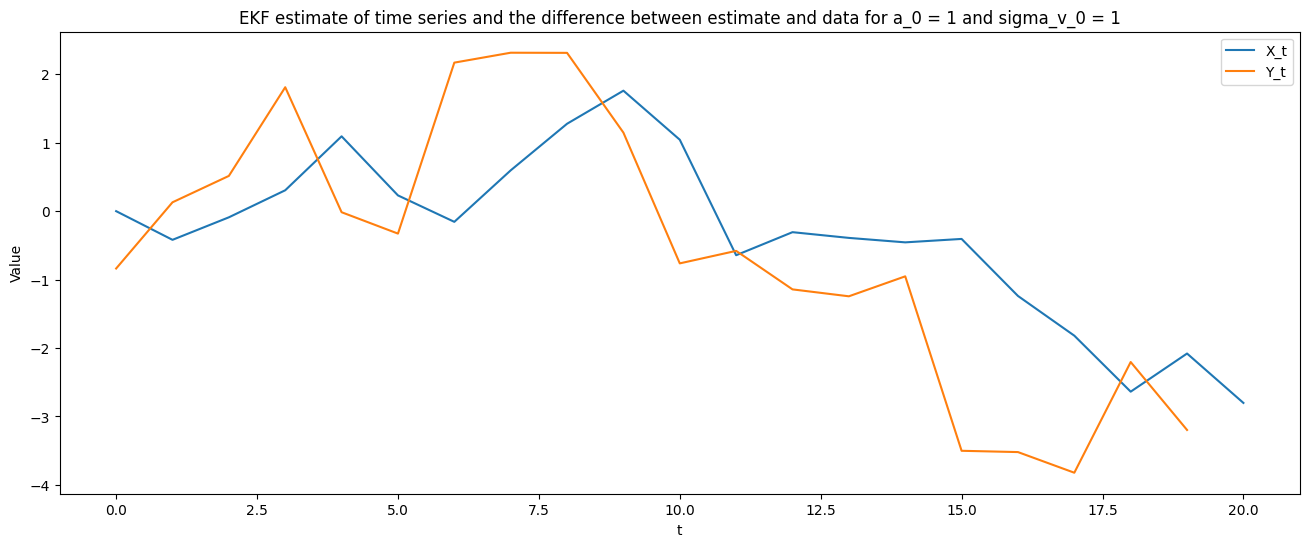

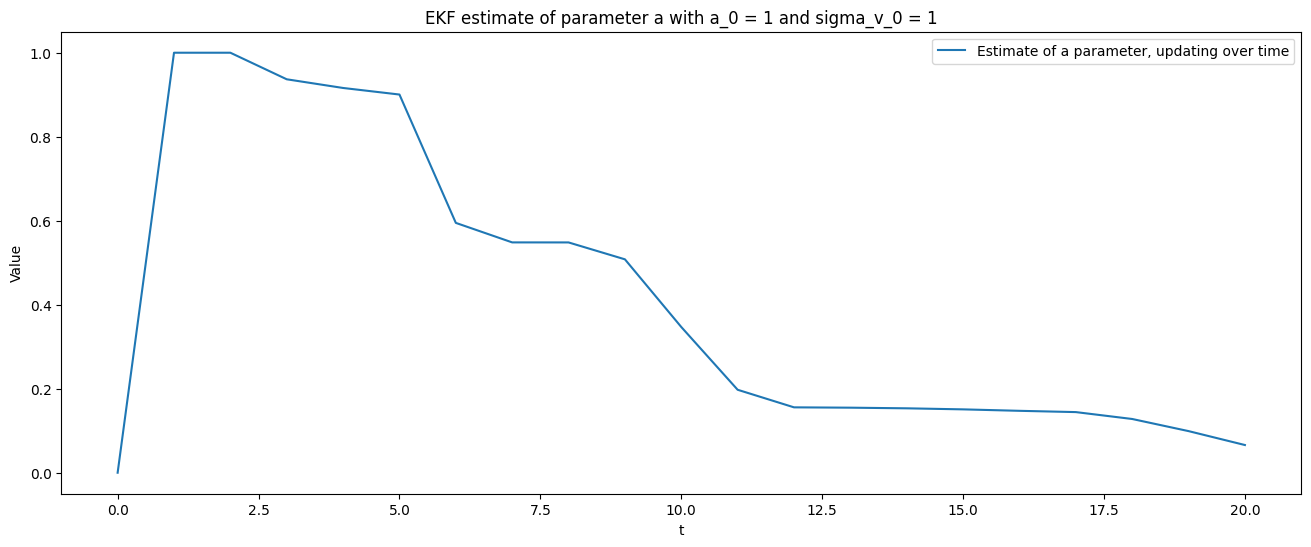

The following a values were observed: [0.         1.         1.         0.93674883 0.91607004 0.90044095
 0.5948477  0.54839188 0.54830922 0.50808406 0.34695774 0.19751223
 0.15566283 0.15486521 0.15334242 0.15084155 0.14739233 0.14434947
 0.12794253 0.099083   0.06593719]
The following estimation is done for a_0 = 10 and sigma_v = 10
[[  0.           0.        ]
 [ -4.18995527  10.        ]
 [  0.58695325  10.        ]
 [  5.15748496  10.00237402]
 [ 18.38960351   9.99703668]
 [-10.10149617   9.38104156]
 [ -6.97814038   9.74233249]
 [ 21.3885978    9.5950204 ]
 [ 28.89269198   9.83374619]
 [  8.92164992   9.30325454]
 [  9.98275672   9.18532559]
 [ -6.68625942   9.1222913 ]
 [ -6.06853701   9.15520138]
 [-10.85890246   9.14179215]
 [-11.96307466   9.11176625]
 [ -9.01183415   9.05538974]
 [-31.93441066   9.02541266]
 [-30.68161048   8.90778726]
 [-28.22317567   8.6588699 ]
 [-15.59662364   8.46810252]
 [-26.95034891   8.39562924]]


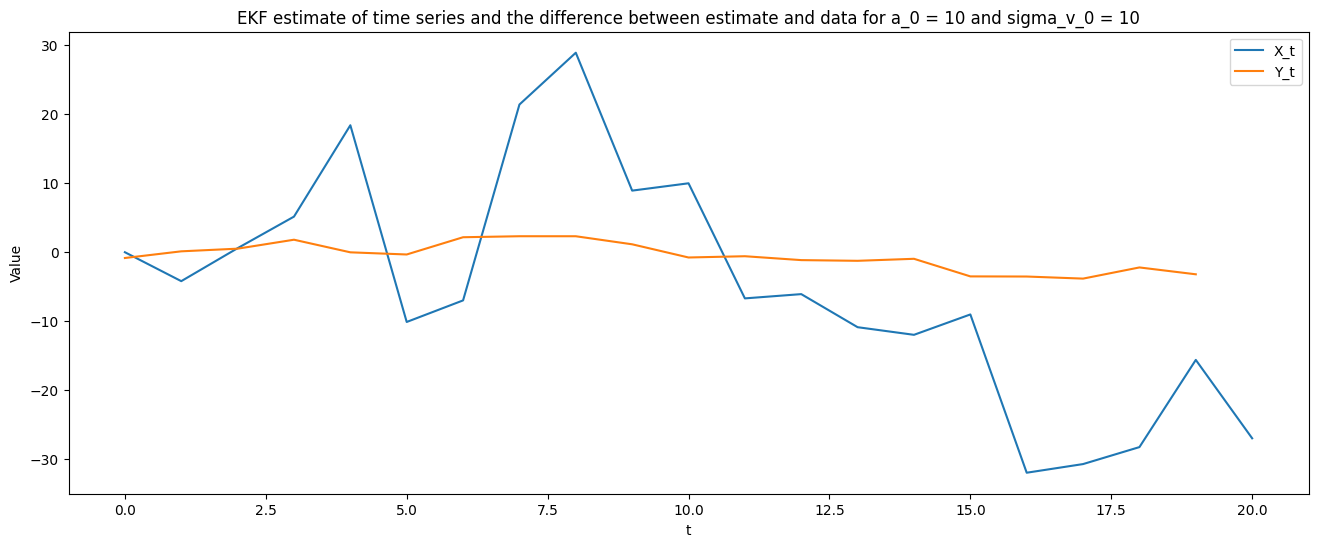

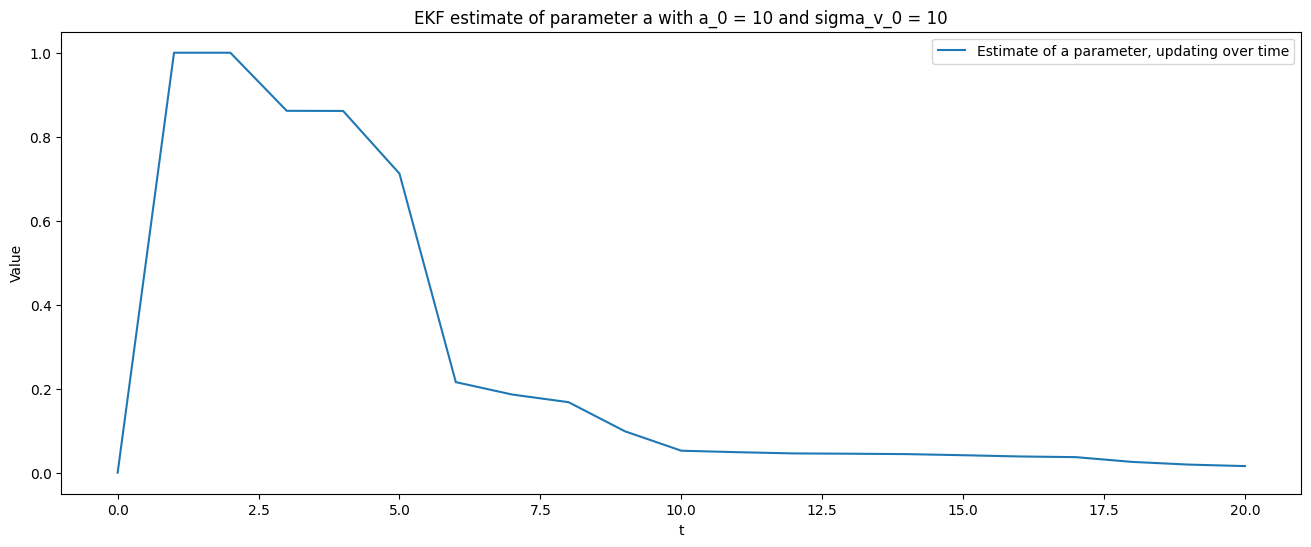

The following a values were observed: [0.         1.         1.         0.86167487 0.86139477 0.71217159
 0.21567484 0.18617757 0.16795352 0.09865325 0.05243832 0.04886616
 0.04594645 0.04524396 0.0443087  0.04169898 0.03873139 0.03708254
 0.02576183 0.0193613  0.01579635]
The following estimation is done for a_0 = 10 and sigma_v = 1
[[  0.           0.        ]
 [ -4.18995527  10.        ]
 [  0.46439602  10.        ]
 [  5.14528228   9.99819602]
 [ 18.42905481   9.99691186]
 [-10.71714271   9.34278421]
 [ -7.52586142   9.7332943 ]
 [ 21.47543055   9.56668416]
 [ 29.34571106   9.82277811]
 [  8.71093774   9.28752321]
 [ 10.04111208   9.17345424]
 [ -6.57349674   9.11054178]
 [ -6.10199397   9.1428803 ]
 [-10.90482335   9.13013832]
 [-12.05111996   9.10006782]
 [ -9.11050374   9.04341145]
 [-31.94752383   9.01282445]
 [-30.88725696   8.89392723]
 [-28.34533924   8.64521543]
 [-15.74093776   8.45422012]
 [-27.0082628    8.38370574]]


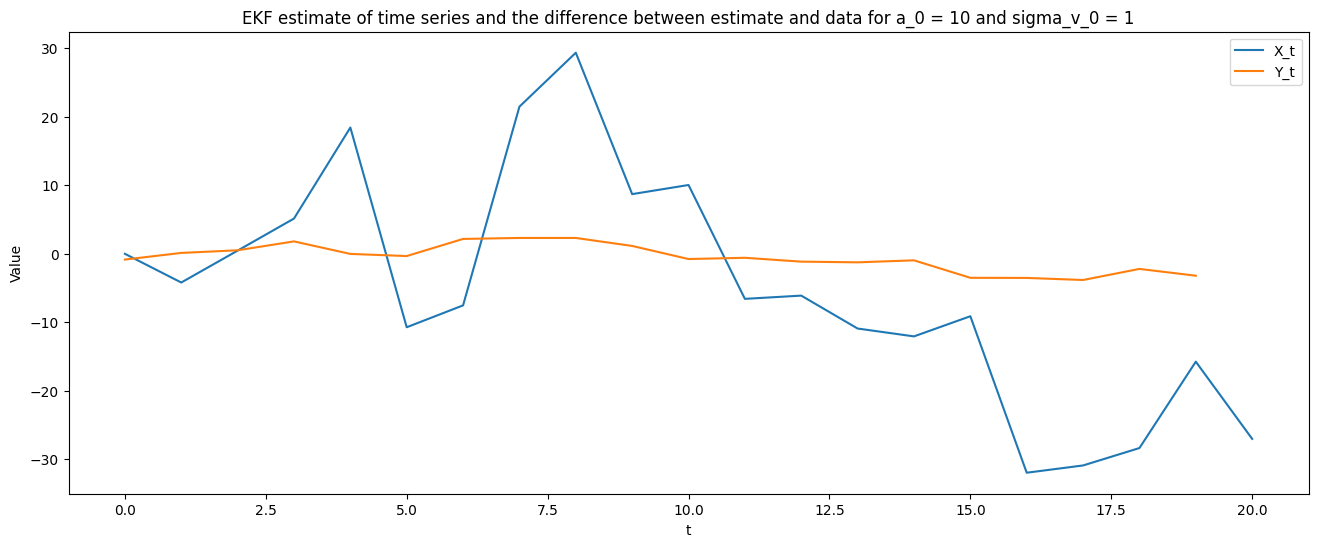

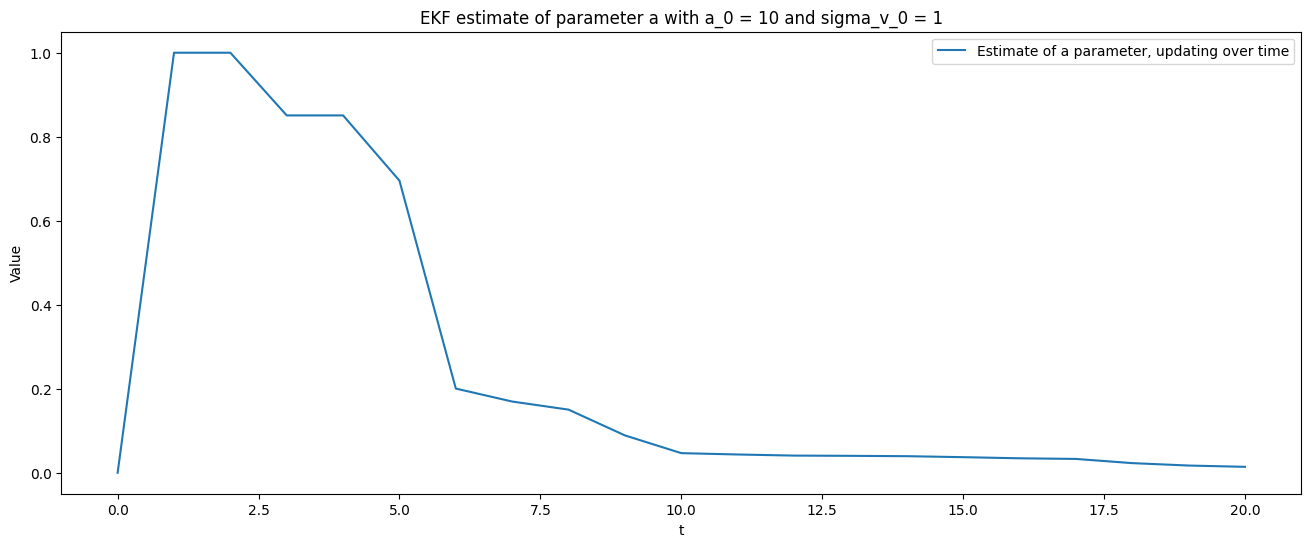

The following a values were observed: [0.         1.         1.         0.85075806 0.85074307 0.69536696
 0.20035218 0.16949097 0.15020654 0.08886737 0.04660348 0.04342393
 0.04078293 0.04022041 0.03938337 0.03704595 0.0343581  0.03284263
 0.02285441 0.01709961 0.01401982]


In [84]:
# We will start by defining the parameters for the Kalman filter optimization

def estimate(a_0 = 1, sigma_v = 1):
    a_0_start, sigma_v_start = a_0, sigma_v
    print(f'The following estimation is done for a_0 = {a_0} and sigma_v = {sigma_v}')
    sigma_a_0 = 1 # The squared sigma value will be sigma_a_0 ** 2 = 1
    sigma_e = 1

    # We will define the variance matrices
    R_v = np.array([[sigma_v, 0], [0, 0]])
    R_e = sigma_e
    R_a = sigma_a_0

    # The data is stored in simulated_data
    Z_t = np.array([[0], [a_0]]) # Initial state estimation
    P_t = np.array([[R_e, 0], [0, R_a]]) # Variance of states before updated in algorithm, no covariance
    H_t = np.array([[1, 0]])
    y = simulated_data['Y_t'].values # Define column to use for estimation
    Z = np.zeros((len(y), 2))
    sigma_a = np.zeros(len(y))
    
    # The X columns is the predictions and the Y is the observations

    for data_idx, data in enumerate(y[ : -1]):        
        f_t = np.array([[Z_t[1][0] * Z_t[0][0]], [Z_t[1][0]]]) # Update of state estimation , differentiate the transition function
        F_t = np.array([[Z_t[1][0], Z_t[0][0]], [0, 1]]) # Define the differentiated
        K_t = F_t @ P_t @ np.transpose(H_t) / (H_t @ P_t @ np.transpose(H_t) + R_e)
        Z_t = f_t + K_t * (data - Z_t[0][0])
        P_t = F_t @ P_t @ np.transpose(F_t) + R_v - K_t @ ((H_t @ P_t @ np.transpose(H_t) + R_e) * np.transpose(K_t))
        Z[data_idx + 1 : ] = Z_t.flatten()
        sigma_a[data_idx + 1] = P_t[1][1]
    print(Z)

    plt.figure(figsize=(16, 6))
    plt.plot(np.arange(Z.shape[0]), Z[:, 0], label = 'X_t')
    plt.plot(np.arange(len(y[ : -1])), y[ : -1], label = 'Y_t')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.title(f'EKF estimate of time series and the difference between estimate and data for a_0 = {a_0_start} and sigma_v_0 = {sigma_v_start}')
    plt.show()

    # Plot of parameter update during estimation
    plt.figure(figsize=(16, 6))
    plt.plot(np.arange(len(sigma_a)), sigma_a, label = 'Estimate of a parameter, updating over time')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('Value')
    plt.title(f'EKF estimate of parameter a with a_0 = {a_0_start} and sigma_v_0 = {sigma_v_start}')
    plt.show()

    print(f'The following a values were observed: {sigma_a}')

    
parametera_array = [[1, 10], [1, 1], [10, 10], [10, 1]]
for parameter_set in parametera_array:
    estimate(parameter_set[0], parameter_set[1])

